<IPython.core.display.Javascript object>


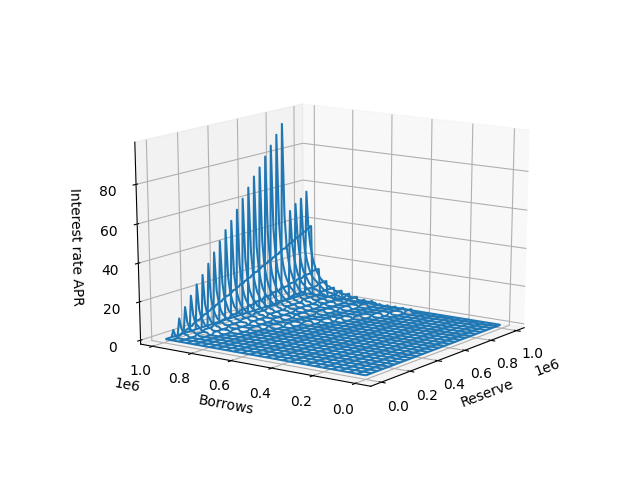

In [25]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

#Best to run this in Jupyer notebook
%matplotlib notebook
# %matplotlib inline

#Take a given market, e.g. for DAI, derrive the equations that govern the interest rates in each of the three markets
#Compound

#Contract 0x000000007675b5E1dA008f037A0800B309e0C493, 21 May 2020
#multiplierPerBlock = 10569930661
#baseRatePerBlock = 0
#kink = 900000000000000000
#jumpMultiplierPerBlock = 570776255707
#blocksPerYear = 2102400
#ReserveFactorMantissa = 50000000000000000


# function utilizationRate(uint cash, uint borrows, uint reserves) public pure returns (uint) {
#     // Utilization rate is 0 when there are no borrows
#     if (borrows == 0) {
#         return 0;
#     }

#     return borrows.mul(1e18).div(cash.add(borrows).sub(reserves));
# }

# function getBorrowRate(uint cash, uint borrows, uint reserves) public view returns (uint) {
#     uint util = utilizationRate(cash, borrows, reserves);

#     if (util <= kink) {
#         return util.mul(multiplierPerBlock).div(1e18).add(baseRatePerBlock);
#     } else {
#         uint normalRate = kink.mul(multiplierPerBlock).div(1e18).add(baseRatePerBlock);
#         uint excessUtil = util.sub(kink);
#         return excessUtil.mul(jumpMultiplierPerBlock).div(1e18).add(normalRate);
#     }
# }
# function getSupplyRate(uint cash, uint borrows, uint reserves, uint reserveFactorMantissa) public view returns (uint) {
#     uint oneMinusReserveFactor = uint(1e18).sub(reserveFactorMantissa);
#     uint borrowRate = getBorrowRate(cash, borrows, reserves);
#     uint rateToPool = borrowRate.mul(oneMinusReserveFactor).div(1e18);
#     return utilizationRate(cash, borrows, reserves).mul(rateToPool).div(1e18);
# }

#Recreate in Python
MULTIPLIER_PER_BLOCK = 10569930661
KINK = 900000000000000000
JUMP_MULTIPLIER_PER_BLOCK = 570776255707
BASE_RATE_PER_BLOCK = 0
RESERVE_FACTOR = 50000000000000000

def utilization_rate(cash: int, borrows: int, reserves: int):
    if borrows == 0 :
        return 0
    return int(borrows * 1e18 / (cash + borrows - reserves))

def get_borrow_rate(cash: int, borrows: int, reserves: int):
    util = utilization_rate(cash=cash, borrows=borrows, reserves=reserves)
    if util <= KINK:
        return int(util * MULTIPLIER_PER_BLOCK / 1e18 + BASE_RATE_PER_BLOCK)
    else:
        normal_rate = KINK * MULTIPLIER_PER_BLOCK / 1e18 +  BASE_RATE_PER_BLOCK
        excess_util = util - KINK
        return int(excess_util * JUMP_MULTIPLIER_PER_BLOCK / 1e18 + normal_rate)

def get_supply_rate(cash: int, borrows:int, reserves: int, reserve_factor: int):
    one_minus_reserve_factor = 1e18 - reserve_factor
    borrow_rate = get_borrow_rate(cash=cash, borrows=borrows, reserves=reserves)
    rate_to_pool = borrow_rate * one_minus_reserve_factor / 1e18
    return int(utilization_rate(cash=cash, borrows=borrows, reserves=reserves) * rate_to_pool / 1e18)

borrows = 12123057761032616257527258
reserves = 172000131734217327575775
cash = 6971699007994218847501026
blocks_per_year = 2102400

#Plot the function
# %matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')

reserves = np.arange(0, 1000000, 10000)
supply = 1000000
borrows = np.arange(0, 1000000, 10000)
R, B = np.meshgrid(reserves, borrows)

br_dict = {}
for b in borrows:
    b_scaled = int(b) * int(1e18)
    for r in reserves:
        r_scaled = int(r) * int(1e18)
        cash = supply - b
        if cash <= 0:
            continue
        #     br_dict[(s_scaled,b_scaled)] = 0
        if cash + b - r <= 0:
            continue
        if cash > 0:
            br = get_borrow_rate(cash=cash, borrows=b, reserves=r)
            br_scaled = (br) / int(1e18)* blocks_per_year
            if br_scaled < 100:
                br_dict[(r_scaled,b_scaled)] = br_scaled 

Z = np.ones((100,100))

for key in br_dict:
    i = int(key[0] / int(1e22))-1
    j = int(key[1] / int(1e22))-1
    Z[i][j] = int(br_dict[key])

surf = ax.plot_wireframe(R, B, Z, rcount = 30, ccount= 30, antialiased=True)

# surf = ax.plot_surface(R, B, Z, rstride=1, cstride=1, cmap=cm.winter, linewidth=0, antialiased=True)
# ax.set_zlim(0, 900000)

ax.set_xlabel('Reserve')
ax.set_ylabel('Borrows')
ax.set_zlabel('Interest rate APR')
plt.show()

#State the objective function for interest rates. what are we trying to maximize? Thing to include: stability, efficiency, responsiveness, economic security?
#Propose a new interest rate model that would maximize these factors, for each protocol given the supply and demand that was experienced, what would the interest rates look like? 
 # - Here, probably cannot make the assumption that supply and demand would remain the same, since these are endogenous to the original system parameters. However, could simulate the behaviour for random supply and demand, or normally distributed supply and demand?

In [10]:
br_dict

): 0.0021909233159136,
 (300000000000000000000000, 70000000000000000000000): 0.0022222222219584,
 (310000000000000000000000, 70000000000000000000000): 0.0022544283409344002,
 (320000000000000000000000, 70000000000000000000000): 0.0022875816983328,
 (330000000000000000000000, 70000000000000000000000): 0.0023217247079712,
 (340000000000000000000000, 70000000000000000000000): 0.0023569023549023997,
 (350000000000000000000000, 70000000000000000000000): 0.0023931623930399997,
 (360000000000000000000000, 70000000000000000000000): 0.0024305555553984,
 (370000000000000000000000, 70000000000000000000000): 0.002469135802176,
 (380000000000000000000000, 70000000000000000000000): 0.0025089605730432,
 (390000000000000000000000, 70000000000000000000000): 0.0025500910730688,
 (400000000000000000000000, 70000000000000000000000): 0.0025925925922848,
 (410000000000000000000000, 70000000000000000000000): 0.0026365348378655997,
 (420000000000000000000000, 70000000000000000000000): 0.0026819923356864003,
 

In [11]:
len(br_dict)

9985